In [1]:
# Import libraries
import pandas as pd
import numpy as np
import cpi
import datetime as dt
import matplotlib.pyplot as plt

# Libraries for regression
# import statsmodels.formula.api as sm
# import statsmodels.api as sm1
# from statsmodels.sandbox.regression.gmm import IV2SLS
# from statsmodels.api import add_constant
# from linearmodels.iv import IV2SLS
# from linearmodels.iv import compare

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_53878/2982935899.py:4: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  import cpi


## Load datasets

In [2]:
# Read files / Load datasets
execu500 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp500fullvariables.csv')
execu400 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp400fullvariables.csv')
execu600 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp600fullvariables.csv')
sp500 = pd.read_csv('/Users/haivanle/Documents/AEA/sp500afull.csv')
sp400 = pd.read_csv('/Users/haivanle/Documents/AEA/sp400afull.csv')
sp600 = pd.read_csv('/Users/haivanle/Documents/AEA/sp600afull.csv')

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_53878/2335064662.py:2: DtypeWarning: Columns (77,80,96) have mixed types. Specify dtype option on import or set low_memory=False.
  execu500 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp500fullvariables.csv')
/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_53878/2335064662.py:3: DtypeWarning: Columns (77,80,96) have mixed types. Specify dtype option on import or set low_memory=False.
  execu400 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp400fullvariables.csv')
/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_53878/2335064662.py:4: DtypeWarning: Columns (77,80,96) have mixed types. Specify dtype option on import or set low_memory=False.
  execu600 = pd.read_csv('/Users/haivanle/Documents/AEA/exesp600fullvariables.csv')
/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_53878/2335064662.py:5: DtypeWarning: Columns (26,30,969,970,980) have mixed types. Specify dtype option on import or set l

## Prepares the dataset for analysis

In [3]:
# Rename key columns
sp500 = sp500.rename(columns={"fyear": "YEAR", "tic": "TICKER"})
sp400 = sp500.rename(columns={"fyear": "YEAR", "tic": "TICKER"})
sp600 = sp500.rename(columns={"fyear": "YEAR", "tic": "TICKER"})

In [4]:
# Combine executive data
df = pd.concat([execu500, execu400, execu600])
df['stockoptions'] = df['STOCK_AWARDS'] + df['OPTION_AWARDS']

# Adjust Stock Options based on CPI, base year is 2022
df["adjusted_stockoptions"] = df.apply(lambda x: cpi.inflate(x["stockoptions"], x["YEAR"]), axis=1)

# Adjust total compensation based on CPI, base year is 2022
df["adjusted_TC"] = df.apply(lambda x: cpi.inflate(x["TOTAL_SEC"], x["YEAR"]), axis=1)

# Change to million USD
df['adjusted_stockoptions'] = df['adjusted_stockoptions'] / 1000
df['adjusted_TC'] = df['adjusted_TC'] / 1000

In [5]:
# Drop rows with negative compensation
df = df[(df['adjusted_stockoptions']>0) & (df['adjusted_TC']>0)]

In [6]:
# Keep only CEOs data
ceo = df[(df['CEOANN'] == 'CEO')]

In [7]:
# Get the year that executive became CEO
ceo['dateceo'] = pd.to_datetime(ceo['BECAMECEO'])
ceo['yearceo'] = ceo['dateceo'].dt.year

# Get the tenure of CEOs - defined as : year of data observation - yearbecame ceo
ceo['tenure'] = (ceo['YEAR'].astype(float) - ceo['yearceo'])

# Drop negative tenures
ceo_tenure = ceo[(ceo['tenure'] > 0)]

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_53878/2882941134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceo['dateceo'] = pd.to_datetime(ceo['BECAMECEO'])
/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_53878/2882941134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceo['yearceo'] = ceo['dateceo'].dt.year
/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_53878/2882941134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [13]:
ceo_tenure.columns

Index(['EXEC_FULLNAME', 'CFOANN', 'EXECDIR', 'OLD_DATAFMT_FLAG', 'INTERLOCK',
       'REPRICE', 'EXECRANK', 'CO_PER_ROL', 'CONAME', 'TITLEANN',
       ...
       'SUB_TELE', 'NAICS', 'SPINDEX', 'SIC', 'stockoptions',
       'adjusted_stockoptions', 'adjusted_TC', 'dateceo', 'yearceo', 'tenure'],
      dtype='object', length=113)

## Outputs a figure or table

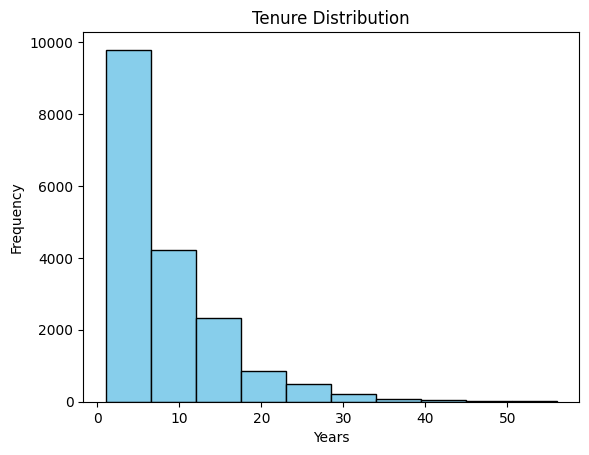

In [20]:
# Plotting a basic histogram
plt.hist(ceo_tenure["tenure"], bins=10, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')
 
# Display the plot
plt.show()

## Produces summary statistics for a sample of interest

In [9]:
ceo_tenure[["adjusted_TC", "adjusted_stockoptions", "tenure"]].describe()

,adjusted_TC,adjusted_stockoptions,tenure
count,18060.000000,18060.000000,18060.000000
mean,10.599521,6.414844,7.959745
std,23.430712,22.515053,7.079754
min,0.045920,0.000365,1.000000
25%,4.238230,1.878145,3.000000
50%,7.687152,4.221171,6.000000
75%,13.480877,8.180412,11.000000
max,2771.539799,2771.471385,56.000000


In [21]:
''' Detect outliers in compensation '''

''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1a = ceo_tenure['adjusted_TC'].quantile(0.25)
Q3a = ceo_tenure['adjusted_TC'].quantile(0.75)
IQRa = Q3a - Q1a
lowera = Q1a - 1.5*IQRa
uppera = Q3a + 1.5*IQRa

# IQR
# Calculate the upper and lower limits
Q1b = ceo_tenure['adjusted_stockoptions'].quantile(0.25)
Q3b = ceo_tenure['adjusted_stockoptions'].quantile(0.75)
IQRb = Q3b - Q1b
lowerb = Q1b - 1.5*IQRb
upperb = Q3b + 1.5*IQRb
 
# Removing the outliers
ceo_tenure = ceo_tenure.loc[(ceo_tenure['adjusted_stockoptions']< upperb) & (ceo_tenure['adjusted_stockoptions'] > lowerb) 
                            & (ceo_tenure['adjusted_TC'] < uppera) & (ceo_tenure['adjusted_TC'] > lowera) ]

In [22]:
''' Detect outliers in tenure '''
# IQR
# Calculate the upper and lower limits
Q1_t = ceo_tenure['tenure'].quantile(0.25)
Q3_t = ceo_tenure['tenure'].quantile(0.75)
IQR_t = Q3_t - Q1_t
lower_t = Q1_t - 1.5*IQR_t
upper_t = Q3_t + 1.5*IQR_t
 
# Removing the outliers
ceo_tenure = ceo_tenure.loc[(ceo_tenure['tenure']< upper_t) & (ceo_tenure['tenure'] > lower_t) ]

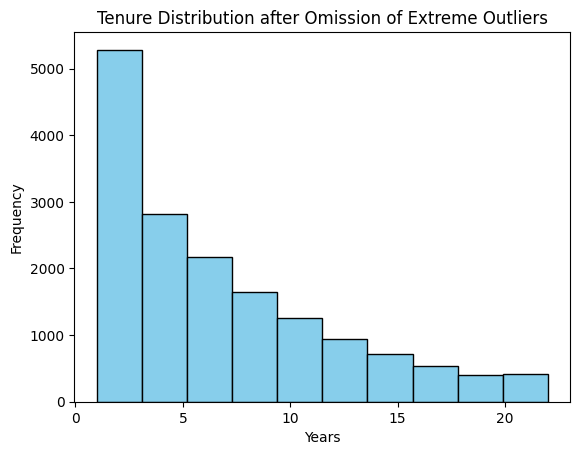

In [24]:
# Plotting a basic histogram
plt.hist(ceo_tenure["tenure"], bins=10, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.title('Tenure Distribution after Omission of Extreme Outliers')
 
# Display the plot
plt.show()

In [13]:
# Combine financial data
df2 = pd.concat([sp500, sp400, sp600])

In [14]:
# Component of Altman's Z-score for public companies
df2['X1'] = (df2['act'] - df2['lct']) / df2['at']
df2['X2'] = df2['re'] / df2['at']
df2['X3'] = df2['ebit'] / df2['at']
df2['X4'] = df2['prcc_f'] * df2['csho'] / df2['lt']
df2['X5'] = df2['sale'] / df2['at']

# Calculate Z-score
df2['zscore'] = 1.2*df2['X1'] + 1.4*df2['X2'] + 3.3*df2['X3'] + 0.6*df2['X4'] + 1.0*df2['X5']

In [15]:
df2['emp'].describe()

count    46404.000000
mean        43.040830
std        104.980433
min          0.000000
25%          5.000000
50%         14.577000
75%         43.000000
max       2300.000000
Name: emp, dtype: float64

In [16]:
# Merge executive data with firm's financial data
secondstage = ceo_tenure.merge(df2, on = ['YEAR', 'TICKER'], how = 'left')
secondstage.head()

,EXEC_FULLNAME,CFOANN,EXECDIR,OLD_DATAFMT_FLAG,INTERLOCK,REPRICE,EXECRANK,CO_PER_ROL,CONAME,TITLEANN,...,stko,weburl,dldte,ipodate,X1,X2,X3,X4,X5,zscore
0,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,0.0,www.aa.com,NaN,NaN,-0.055001,-0.109281,0.036370,0.225802,0.774164,0.810671
1,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,0.0,www.aa.com,NaN,NaN,-0.055001,-0.109281,0.036370,0.225802,0.774164,0.810671
2,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,0.0,www.aa.com,NaN,NaN,-0.055001,-0.109281,0.036370,0.225802,0.774164,0.810671
3,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,0.0,www.aa.com,NaN,NaN,-0.043891,-0.025200,0.036016,0.135026,0.801372,0.913289
4,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,0.0,www.aa.com,NaN,NaN,-0.043891,-0.025200,0.036016,0.135026,0.801372,0.913289


In [17]:
secondstage['zscore'].describe()

count    13908.000000
mean         4.127047
std          4.160550
min        -11.967550
25%          1.870505
50%          3.215587
75%          4.857279
max         55.433156
Name: zscore, dtype: float64

In [19]:
# Read Chicago Board Momemtum Data - Volatility Index and FAMA
CBVIXFAMA = pd.read_csv('/Users/haivanle/Documents/AEA/CBVIX.csv') 

In [20]:
secondstage = secondstage.merge(CBVIXFAMA, on = ['YEAR'], how = 'left')

In [21]:
# Create dummies for policies
# TARP's Pay Czar : 2009-2010
# Dodd Frank Act : 2010 - present
# SOX : 2002 - present

# If the year is 2009-2010, the value is 1, otherwise, it is 0
secondstage['payczar'] = np.where((secondstage['YEAR'] == 2009.0) | (secondstage['YEAR'] == 2010.0), 1, 0)

# If the year is 2010-2022, the value is 1, otherwise, it is 0
secondstage['doddfrank'] = np.where((secondstage['YEAR'] == 2010.0) | (secondstage['YEAR'] == 2011.0) | 
                                    (secondstage['YEAR'] == 2012.0) |
                                    (secondstage['YEAR'] == 2013.0) | (secondstage['YEAR'] == 2014.0) | 
                                    (secondstage['YEAR'] == 2015.0) | (secondstage['YEAR'] == 2016.0) |
                                    (secondstage['YEAR'] == 2017.0) | (secondstage['YEAR'] == 2018.0) |
                                    (secondstage['YEAR'] == 2019.0) | (secondstage['YEAR'] == 2020.0) |
                                    (secondstage['YEAR'] == 2021.0) | (secondstage['YEAR'] == 2022.0), 1, 0) 

In [27]:
secondstage.to_csv('/Users/haivanle/Documents/AEA/zscorefinal1.csv') 

In [22]:
# Read stock data
stockreturn = pd.read_csv('/Users/haivanle/Documents/AEA/stockreturnclean.csv')

/var/folders/6_/w9g0lyhn5632jr666js3y_lw0000gn/T/ipykernel_9298/3797098431.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  stockreturn = pd.read_csv('/Users/haivanle/Documents/AEA/stockreturnclean.csv')


In [23]:
# Merge executive data with firm's financial data
stockemp = ceo_tenure.merge(df2[['YEAR', 'TICKER', 'emp']], on = ['YEAR', 'TICKER'], how = 'left')
stockemp.head()

,EXEC_FULLNAME,CFOANN,EXECDIR,OLD_DATAFMT_FLAG,INTERLOCK,REPRICE,EXECRANK,CO_PER_ROL,CONAME,TITLEANN,...,NAICS,SPINDEX,SIC,stockoptions,adjusted_stockoptions,adjusted_TC,dateceo,yearceo,tenure,emp
0,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,481111,2030,4512,9410.276,13.660537,14.808487,2003-04-25,2003.0,3.0,86.6
1,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,481111,2030,4512,9410.276,13.660537,14.808487,2003-04-25,2003.0,3.0,86.6
2,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,481111,2030,4512,9410.276,13.660537,14.808487,2003-04-25,2003.0,3.0,86.6
3,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,481111,2030,4512,5895.570,8.321363,9.657765,2003-04-25,2003.0,4.0,85.5
4,Gerard J. Arpey,NaN,1,0,0,0,NaN,14221,AMERICAN AIRLINES GROUP INC,"chairman, president & CEO",...,481111,2030,4512,5895.570,8.321363,9.657765,2003-04-25,2003.0,4.0,85.5


In [24]:
# Change merge style
stockiv = stockemp.merge(stockreturn, on = ['YEAR', 'TICKER'], how = 'left')

In [25]:
stockiv = stockiv.merge(CBVIXFAMA, on = ['YEAR'], how = 'left')
# Create dummies for policies
# TARP's Pay Czar : 2009-2010
# Dodd Frank Act : 2010 - present
# SOX : 2002 - present

# If the year is 2009-2010, the value is 1, otherwise, it is 0
stockiv['payczar'] = np.where((stockiv['YEAR'] == 2009) | (stockiv['YEAR'] == 2010), 1, 0)

# If the year is 2010-2022, the value is 1, otherwise, it is 0
stockiv['doddfrank'] = np.where((stockiv['YEAR'] == 2010) | (stockiv['YEAR'] == 2011) | 
                                    (stockiv['YEAR'] == 2012) |
                                    (stockiv['YEAR'] == 2013) | (stockiv['YEAR'] == 2014) | 
                                    (stockiv['YEAR'] == 2015) | (stockiv['YEAR'] == 2016) |
                                    (stockiv['YEAR'] == 2017) | (stockiv['YEAR'] == 2018) |
                                    (stockiv['YEAR'] == 2019) | (stockiv['YEAR'] == 2020) |
                                    (stockiv['YEAR'] == 2021) | (stockiv['YEAR'] == 2022), 1, 0) 

In [26]:
stockiv.to_csv('/Users/haivanle/Documents/AEA/stockvolfinal1.csv') 